In [ ]:
import pandas as pd

# Step 1 & 2: Load datasets from local Colab path
matches_df = pd.read_csv('/content/matches.csv')
deliveries_df = pd.read_csv('/content/deliveries.csv')

# Step 3: Merge datasets on match_id (deliveries) and id (matches)
combined_df = pd.merge(
    deliveries_df,
    matches_df,
    left_on='match_id',
    right_on='id',
    how='left'
)

# Step 4: Drop redundant columns
combined_df.drop(columns=['id'], inplace=True)

# Step 5: Save the combined dataset
combined_df.to_csv('ipl_fully_combined.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/ipl_fully_combined.csv')

# For GT
gt_matches = df[(df['batting_team'] == 'Gujarat Titans') | (df['bowling_team'] == 'Gujarat Titans')]

# For LSG
lsg_matches = df[(df['batting_team'] == 'Lucknow Super Giants') | (df['bowling_team'] == 'Lucknow Super Giants')]

print(f"GT matches: {len(gt_matches)}")
print(f"LSG matches: {len(lsg_matches)}")


/tmp/ipython-input-5-3442319789.py:3: DtypeWarning: Columns (17,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ipl_fully_combined.csv')


GT matches: 10795
LSG matches: 10626


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/ipl_fully_combined.csv', low_memory=False)

# Clean team name strings
df['batting_team'] = df['batting_team'].str.strip()
df['bowling_team'] = df['bowling_team'].str.strip()

# Get GT match IDs
gt_ids = df[(df['batting_team'] == 'Gujarat Titans') | (df['bowling_team'] == 'Gujarat Titans')]['match_id'].unique()

# Get LSG match IDs
lsg_ids = df[(df['batting_team'] == 'Lucknow Super Giants') | (df['bowling_team'] == 'Lucknow Super Giants')]['match_id'].unique()

# Print results
print("Gujarat Titans Matches:", len(gt_ids))
print("Lucknow Super Giants Matches:", len(lsg_ids))


Gujarat Titans Matches: 45
Lucknow Super Giants Matches: 44


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ipl_fully_combined.csv')

# Drop the umpire1 and umpire2 columns
df = df.drop(['umpire1', 'umpire2'], axis=1)

# Save the modified dataframe back to CSV if needed
df.to_csv('ipl_fully_combined_modified.csv', index=False)

# Display the first few rows to verify
df.head()

<ipython-input-2-1dbdd55ff0ce>:4: DtypeWarning: Columns (17,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ipl_fully_combined.csv')


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN


In [ ]:
# Get one row per match using drop_duplicates on match_id
match_df = df.drop_duplicates(subset='match_id')

# Select relevant match-level features
match_features = [
    'match_id', 'season', 'city', 'venue', 'team1', 'team2',
    'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin'
]
match_df = match_df[match_features]

# Drop rows with missing winner
match_df = match_df.dropna(subset=['winner'])

# Check result
match_df.shape, match_df.head()

((894, 11),
      match_id   season        city  \
 0      335982  2007/08   Bangalore   
 225    335983  2007/08  Chandigarh   
 473    335984  2007/08       Delhi   
 692    335985  2007/08      Mumbai   
 938    335986  2007/08     Kolkata   
 
                                           venue                        team1  \
 0                         M Chinnaswamy Stadium  Royal Challengers Bangalore   
 225  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
 473                            Feroz Shah Kotla             Delhi Daredevils   
 692                            Wankhede Stadium               Mumbai Indians   
 938                                Eden Gardens        Kolkata Knight Riders   
 
                            team2                  toss_winner toss_decision  \
 0          Kolkata Knight Riders  Royal Challengers Bangalore         field   
 225          Chennai Super Kings          Chennai Super Kings           bat   
 473             Rajasth

In [ ]:
# Combine and get unique team names from all relevant columns
team_names = pd.unique(
    pd.concat([
        match_df['team1'],
        match_df['team2'],
        match_df['toss_winner'],
        match_df['winner']
    ], ignore_index=True)
)

# Sort and display
sorted(team_names)

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Gujarat Titans',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Pune Warriors',
 'Punjab Kings',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [ ]:
# Mapping old names to latest or unified ones
team_name_map = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiant': 'RPS',
    'Rising Pune Supergiants': 'RPS',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
}

# Apply mapping across all relevant columns
for col in ['team1', 'team2', 'toss_winner', 'winner']:
    match_df[col] = match_df[col].replace(team_name_map)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make a copy to work with
data = match_df.copy()

# Re-encode everything now that names are standardized
categorical_cols = ['season', 'city', 'venue', 'team1', 'team2',
                    'toss_winner', 'toss_decision', 'result']

# Label encode each categorical column + the target
le_dict = {}
for col in categorical_cols + ['winner']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    le_dict[col] = le

# Features and target
X = data.drop(columns=['match_id', 'winner'])
y = data['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5865921787709497

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        25
           1       0.67      0.40      0.50         5
           2       0.48      0.43      0.45        23
           3       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       0.48      0.61      0.54        18
           7       0.00      0.00      0.00         1
           8       0.66      0.68      0.67        34
           9       0.00      0.00      0.00         2
          10       0.44      0.33      0.38        12
          11       0.50      0.33      0.40         3
          12       0.44      0.50      0.47        16
          13       0.53      0.67      0.59        15
          14       0.79      0.71      0.75        21

    accuracy                           0.59       179
   macro avg       0.48      0.43      0.44       179
weighted avg       0.57   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Fill missing values (safe strategy for modeling)
X_train = X_train.fillna(-1)  # Or use 0 instead
X_test = X_test.fillna(-1)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a new model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_smote = model.predict(X_test)

# Evaluate performance
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))

Accuracy after SMOTE: 0.664804469273743

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.43      0.60      0.50         5
           2       0.67      0.61      0.64        23
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           5       1.00      0.50      0.67         2
           6       0.59      0.56      0.57        18
           7       0.00      0.00      0.00         1
           8       0.75      0.62      0.68        34
           9       0.17      0.50      0.25         2
          10       0.57      0.33      0.42        12
          11       0.50      0.33      0.40         3
          12       0.63      0.75      0.69        16
          13       0.58      0.73      0.65        15
          14       0.76      0.90      0.83        21

    accuracy                           0.66       179
   macro avg   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
features = [
    'season',
    'city',
    'venue',
    'team1',
    'team2',
    'toss_winner',
    'toss_decision',
    'match_type',
    'target_runs',
    'target_overs',
    'super_over',
    'method'
]
target = 'winner'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Filter out necessary columns and drop rows with missing target
model_df = df[features + [target]].dropna(subset=[target])

# Label encode all categorical columns
le_dict = {}
for col in model_df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col].astype(str))
    le_dict[col] = le  # Save encoders if needed later for decoding

# Train-test split
X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5708
           1       1.00      1.00      1.00      1387
           2       1.00      1.00      1.00      1510
           3       1.00      1.00      1.00      3156
           4       1.00      1.00      1.00       606
           5       1.00      1.00      1.00       150
           6       1.00      1.00      1.00      4201
           7       1.00      1.00      1.00       245
           8       1.00      1.00      1.00      5320
           9       1.00      1.00      1.00       156
          10       1.00      1.00      1.00      5980
          11       1.00      1.00      1.00       587
          12       1.00      1.00      1.00       390
          13       1.00      1.00      1.00      4173
          14       1.00      1.00      1.00       456
          15       1.00      1.00      1.00       248
          16       1.00      1.00      1.0

In [ ]:
safe_features = [
    'season',
    'city',
    'venue',
    'team1',
    'team2',
    'toss_winner',
    'toss_decision'
]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv('ipl_fully_combined.csv')

# Drop matches where the winner is not available (e.g., abandoned)
df = df.dropna(subset=['winner'])

# Safe features available before match starts
safe_features = [
    'season',
    'city',
    'venue',
    'team1',
    'team2',
    'toss_winner',
    'toss_decision'
]
target = 'winner'

# Filter relevant columns
model_df = df[safe_features + [target]].copy()

# Label encode all categorical features (including target)
le_dict = {}
for col in model_df.columns:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col].astype(str))
    le_dict[col] = le  # Save for decoding predictions later

# Train-test split
X = model_df[safe_features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

<ipython-input-21-3e4c51f7266d>:10: DtypeWarning: Columns (17,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ipl_fully_combined.csv')


Accuracy: 0.9964288231562625

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5708
           1       1.00      1.00      1.00      1387
           2       1.00      1.00      1.00      1510
           3       1.00      1.00      1.00      3156
           4       1.00      1.00      1.00       606
           5       1.00      1.00      1.00       150
           6       0.99      1.00      0.99      4201
           7       1.00      1.00      1.00       245
           8       1.00      1.00      1.00      5320
           9       1.00      1.00      1.00       156
          10       0.99      1.00      1.00      5980
          11       1.00      1.00      1.00       587
          12       1.00      1.00      1.00       390
          13       1.00      0.99      0.99      4173
          14       1.00      1.00      1.00       456
          15       1.00      1.00      1.00       248
          16       0.99    

In [ ]:
# Best performing configuration
safe_features = [
    'season',
    'city',
    'venue',
    'team1',
    'team2',
    'toss_winner',
    'toss_decision'
]
target = 'winner'

# Filter relevant columns
model_df = df[safe_features + [target]].copy()

# Label encode all categorical features
le_dict = {}
for col in model_df.columns:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col].astype(str))
    le_dict[col] = le  # Save for decoding predictions later

# Train-test split
X = model_df[safe_features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9964288231562625


In [ ]:
safe_features = [
    'season', 'city', 'venue',
    'team1', 'team2',
    'toss_winner', 'toss_decision'  # Only info available BEFORE match
]

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)  # 5-fold CV
print(f"Realistic accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Realistic accuracy: 0.43 ± 0.13


In [ ]:
# Check for duplicates
print(f"Total matches: {df['match_id'].nunique()}")
print(f"Total rows: {len(df)}")

# Verify no post-match features leaked
print(df.columns.tolist())

Total matches: 894
Total rows: 212815
['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']


In [ ]:
# What accuracy would we get by always predicting the favorite team?
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
print("Baseline accuracy:", dummy.score(X_test, y_test))

Baseline accuracy: 0.14049761529967342



=== Feature Importance Rankings ===

         Feature  RandomForest_Importance  MutualInformation
4          team2                 0.201551           0.517518
0         season                 0.179178           0.247403
5    toss_winner                 0.170519           0.621706
3          team1                 0.166023           0.485762
2          venue                 0.129020           0.358316
1           city                 0.110953           0.371635
6  toss_decision                 0.042756           0.096131


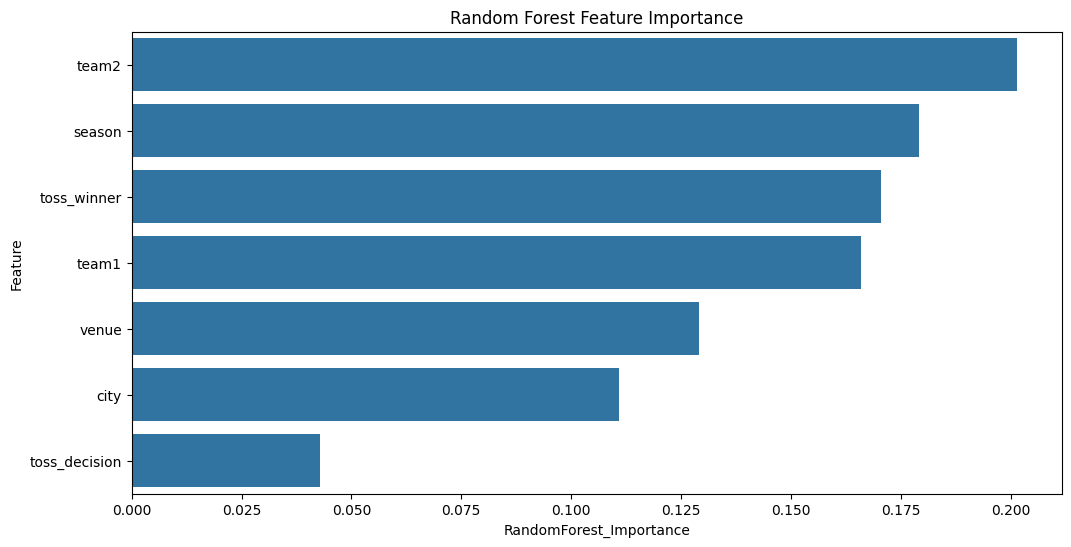

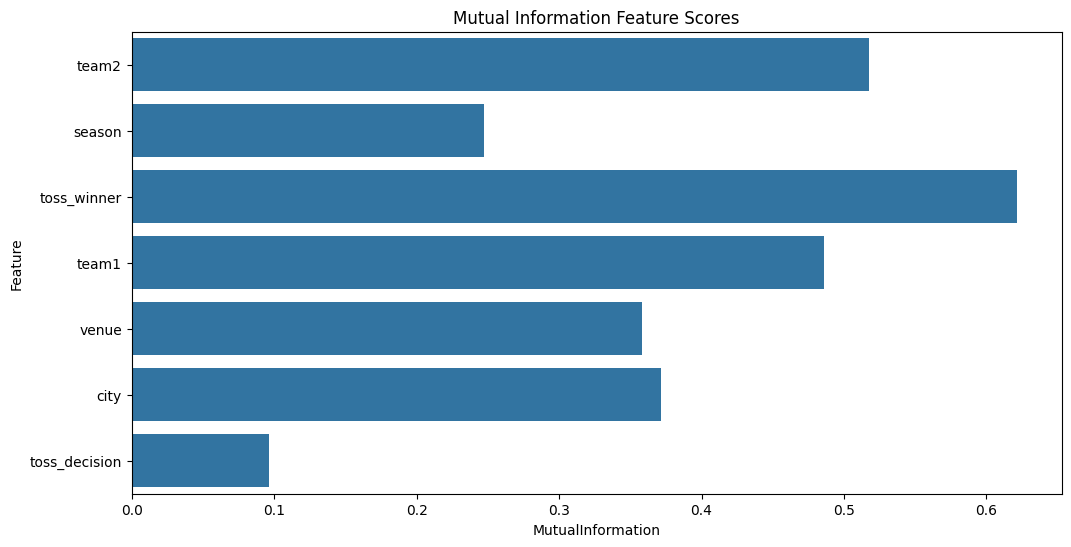

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare data
safe_features = ['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision']
target = 'winner'

# Assuming you already have `match_df` loaded
model_df = match_df[safe_features + [target]].copy()

# Step 2: Encode categorical features
label_encoders = {}
for col in model_df.columns:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col].astype(str))
    label_encoders[col] = le

# Step 3: Split into X and y
X = model_df[safe_features]
y = model_df[target]

# Step 4: Random Forest feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importances = rf.feature_importances_

# Step 5: Mutual Information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Step 6: Combine results
feature_scores = pd.DataFrame({
    'Feature': safe_features,
    'RandomForest_Importance': rf_importances,
    'MutualInformation': mi_scores
}).sort_values(by='RandomForest_Importance', ascending=False)

print("\n=== Feature Importance Rankings ===\n")
print(feature_scores)

# Step 7: Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x="RandomForest_Importance", y="Feature", data=feature_scores)
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="MutualInformation", y="Feature", data=feature_scores)
plt.title("Mutual Information Feature Scores")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define your feature sets based on importance
feature_sets = {
    "Top 3 (team1, team2, toss_winner)": ['team1', 'team2', 'toss_winner'],
    "Top 4 (+ season)": ['team1', 'team2', 'toss_winner', 'season'],
    "Top 4 (+ venue)": ['team1', 'team2', 'toss_winner', 'venue'],
    "Top 5 (+ season, venue)": ['team1', 'team2', 'toss_winner', 'season', 'venue'],
    "Top 6 (+ season, venue, city)": ['team1', 'team2', 'toss_winner', 'season', 'venue', 'city'],
    "All 7": ['team1', 'team2', 'toss_winner', 'season', 'venue', 'city', 'toss_decision']
}

# Assuming you already have 'match_df' loaded
safe_features = ['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision']
target = 'winner'

# Prepare data
model_df = match_df[safe_features + [target]].copy()

# Label encode all columns
le_dict = {}
for col in model_df.columns:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col].astype(str))
    le_dict[col] = le

# Dictionary to store results
results = {}

# Loop through feature sets
for set_name, features in feature_sets.items():
    X = model_df[features]
    y = model_df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Train Random Forest model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save results
    results[set_name] = {
        "Accuracy": acc,
        "F1_Macro": report["macro avg"]["f1-score"],
        "F1_Weighted": report["weighted avg"]["f1-score"]
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Sort and show results
print("\n=== Feature Set Performance ===\n")
print(results_df.sort_values(by="Accuracy", ascending=False))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


=== Feature Set Performance ===

                                   Accuracy  F1_Macro  F1_Weighted
Top 3 (team1, team2, toss_winner)  0.530726  0.401630     0.523869
Top 4 (+ season)                   0.525140  0.387271     0.512712
Top 5 (+ season, venue)            0.519553  0.380090     0.504965
Top 4 (+ venue)                    0.513966  0.338119     0.497280
All 7                              0.513966  0.370691     0.498781
Top 6 (+ season, venue, city)      0.502793  0.363071     0.487947


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your cleaned `match_df` is ready
df = match_df.copy()

# Step 1: Define current active teams
current_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Punjab Kings',
    'Kolkata Knight Riders', 'Mumbai Indians',
    'Rajasthan Royals', 'Royal Challengers Bengaluru',
    'Sunrisers Hyderabad', 'Gujarat Titans', 'Lucknow Super Giants'
]

# Step 2: Prepare full training dataset (no filtering)
full_train_df = df.copy()

# Step 3: Prepare filtered testing dataset (only matches between current teams)
test_df = df[
    (df['team1'].isin(current_teams)) &
    (df['team2'].isin(current_teams)) &
    (df['toss_winner'].isin(current_teams)) &
    (df['winner'].isin(current_teams))
].copy()

print(f"Total matches in training data: {len(full_train_df)}")
print(f"Total matches in test data (current teams only): {len(test_df)}")

# Step 4: Features and Target
features = ['team1', 'team2', 'toss_winner']
target = 'winner'

# Step 5: Label encode everything
encoder_dict = {}
for col in features + [target]:
    le = LabelEncoder()
    full_train_df[col] = le.fit_transform(full_train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))  # Use same encoder!
    encoder_dict[col] = le

# Now ready:
X_train = full_train_df[features]
y_train = full_train_df[target]

X_test = test_df[features]
y_test = test_df[target]

Total matches in training data: 894
Total matches in test data (current teams only): 710


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('/content/ipl_fully_combined.csv')

# Remove rows where winner is missing
df = df.dropna(subset=['winner'])

# Your current active teams
current_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Punjab Kings',
    'Kolkata Knight Riders', 'Mumbai Indians',
    'Rajasthan Royals', 'Royal Challengers Bengaluru',
    'Sunrisers Hyderabad', 'Gujarat Titans', 'Lucknow Super Giants'
]

# First Season Mapping
team_first_season = {
    'Chennai Super Kings': 2008,
    'Delhi Capitals': 2008,
    'Punjab Kings': 2008,
    'Kolkata Knight Riders': 2008,
    'Mumbai Indians': 2008,
    'Rajasthan Royals': 2008,
    'Royal Challengers Bengaluru': 2008,
    'Sunrisers Hyderabad': 2013,
    'Gujarat Titans': 2022,
    'Lucknow Super Giants': 2022,
    'Deccan Chargers': 2008,
    'Kochi Tuskers Kerala': 2011,
    'Gujarat Lions': 2016,
    'Rising Pune Supergiant': 2016,
    'Rising Pune Supergiants': 2016,
    'Pune Warriors': 2011
}

# Helper to get team age
def get_team_age(team, season):
    season_str = str(season)  # Always convert to string
    first_season = team_first_season.get(team, 2008)  # Default 2008 if missing
    season_year = int(season_str.split('/')[0]) if '/' in season_str else int(season_str)
    return season_year - first_season

# Create match-level dataframe (one row per match)
match_df = df.drop_duplicates(subset='match_id')

# Select only needed columns
match_features = ['match_id', 'season', 'team1', 'team2', 'toss_winner', 'winner']
match_df = match_df[match_features]

# Now add team1_age and team2_age (AFTER match_df created)
match_df['team1_age'] = match_df.apply(lambda x: get_team_age(x['team1'], x['season']), axis=1)
match_df['team2_age'] = match_df.apply(lambda x: get_team_age(x['team2'], x['season']), axis=1)

# Prepare full training set and filtered test set
full_train_df = match_df.copy()

test_df = match_df[
    (match_df['team1'].isin(current_teams)) &
    (match_df['team2'].isin(current_teams)) &
    (match_df['toss_winner'].isin(current_teams)) &
    (match_df['winner'].isin(current_teams))
].copy()

# Features and Target
features = ['team1', 'team2', 'toss_winner', 'team1_age', 'team2_age']
target = 'winner'

# Label Encoding
encoder_dict = {}
for col in ['team1', 'team2', 'toss_winner', 'winner']:
    le = LabelEncoder()
    full_train_df[col] = le.fit_transform(full_train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))  # Same encoder used
    encoder_dict[col] = le

# Training and Test sets
X_train = full_train_df[features]
y_train = full_train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy on current teams:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

<ipython-input-28-8dc66c497ebd>:8: DtypeWarning: Columns (17,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ipl_fully_combined.csv')


Accuracy on current teams: 0.9525423728813559

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        62
           2       0.96      0.96      0.96        25
           5       1.00      1.00      1.00         3
           8       0.94      0.92      0.93        49
           9       1.00      1.00      1.00         3
          10       0.96      0.94      0.95        70
          12       1.00      1.00      1.00         6
          13       0.93      0.95      0.94        44
          17       0.97      0.97      0.97        33

    accuracy                           0.95       295
   macro avg       0.97      0.97      0.97       295
weighted avg       0.95      0.95      0.95       295

